# Downloading the Data 

Dataset : https://storage.googleapis.com/openimages/web/visualizer/index.html?type=detection&set=train&c=%2Fm%2F05gqfk

In [ ]:
#!pip install fiftyone
import fiftyone as fo


train_dataset = fo.zoo.load_zoo_dataset(
              "open-images-v7",
              split="train",
              label_types=["detections"],
              classes=["Plastic bag"],
              max_samples=1000,
          )


In [ ]:
validation_dataset = fo.zoo.load_zoo_dataset(
              "open-images-v7",
              split="validation",
              label_types=["detections"],
              classes=["Plastic bag"],
              max_samples=10,
          )

In [ ]:
# Converting them into Zip file
import shutil

shutil.make_archive('/root/fiftyone/zipped/trainImages','zip','/root/fiftyone/open-images-v7/train')
shutil.make_archive('/root/fiftyone/zipped/validationImages','zip','/root/fiftyone/open-images-v7/validation')

# Importing Data

In [1]:
import zipfile

zip_file_path  = ["trainImages.zip","validationImages.zip"]

for path in zip_file_path:
    name = str(path)
    with zipfile.ZipFile(path,'r') as zip_ref:
        zip_ref.extractall(f'unzipped/{name.split(".")[0]}')

In [1]:
import pandas as pd

df_validation = pd.read_csv("unzipped/validationImages/labels/detections.csv")
df_validation.head()

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
0,0001eeaf4aed83f9,xclick,/m/0cmf2,1,0.022673,0.964201,0.071038,0.800546,0,0,0,0,0
1,000595fe6fee6369,xclick,/m/02wbm,1,0.000000,1.000000,0.000000,1.000000,0,0,1,0,0
2,000595fe6fee6369,xclick,/m/02xwb,1,0.141384,0.179676,0.676275,0.731707,0,0,0,0,0
3,000595fe6fee6369,xclick,/m/02xwb,1,0.213549,0.253314,0.299335,0.354767,1,0,0,0,0
4,000595fe6fee6369,xclick,/m/02xwb,1,0.232695,0.288660,0.490022,0.545455,1,0,0,0,0


In [2]:
import pandas as pd

# This Cell will not run because the data inside it is very huge which is 2.1 GB and normal CPU cann`t h

df_train = pd.read_csv("unzipped/trainImages/labels/detections.csv")
df_train.head()

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,IsDepiction,IsInside,XClick1X,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y
0,000002b66c9c498e,xclick,/m/01g317,1,0.012500,0.195312,0.148438,0.587500,0,1,...,0,0,0.148438,0.012500,0.059375,0.195312,0.148438,0.357812,0.587500,0.325000
1,000002b66c9c498e,xclick,/m/01g317,1,0.025000,0.276563,0.714063,0.948438,0,1,...,0,0,0.025000,0.248438,0.276563,0.214062,0.914062,0.714063,0.782813,0.948438
2,000002b66c9c498e,xclick,/m/01g317,1,0.151562,0.310937,0.198437,0.590625,1,0,...,0,0,0.243750,0.151562,0.310937,0.262500,0.198437,0.434375,0.507812,0.590625
3,000002b66c9c498e,xclick,/m/01g317,1,0.256250,0.429688,0.651563,0.925000,1,0,...,0,0,0.315625,0.429688,0.256250,0.423438,0.651563,0.921875,0.826562,0.925000
4,000002b66c9c498e,xclick,/m/01g317,1,0.257812,0.346875,0.235938,0.385938,1,0,...,0,0,0.317188,0.257812,0.346875,0.307812,0.235938,0.289062,0.348438,0.385938


# EDA 

In [3]:
data_path_validation = "unzipped/validationImages/data/*.jpg"
data_path_train = "unzipped/trainImages/data/*.jpg"

In [4]:
import glob
counter = 0

img_paths = data_path_train
folder = glob.glob(img_paths)

for i in folder:
    counter+=1
print(counter)

449


In [5]:
import glob
counter = 0

img_paths = data_path_validation
folder = glob.glob(img_paths)

for i in folder:
    counter+=1
print(counter)

9


# Data Cleaning

In [4]:
print(len(df_train))
print(len(df_validation))

14610229
303980


In [6]:
def clean_dataframe(df_for_train,df_for_validation):
    df_train_cleansed = df_train[df_train['LabelName'].str.contains('/m/05gqfk')]
    df_validation_cleansed = df_validation[df_validation['LabelName'].str.contains('/m/05gqfk')]
    
    return df_train_cleansed, df_validation_cleansed

df_train_cleansed, df_validation_cleansed = clean_dataframe(df_train, df_validation)

In [7]:
# we total Have 986 values of training data
len(df_train_cleansed)

986

In [8]:
# we total Have 9 values of training data
len(df_validation_cleansed)

9

In [9]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_train_cleansed, test_size = 0.2, random_state = 42)

In [10]:
train.shape

(788, 21)

In [12]:
train.head()

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,IsDepiction,IsInside,XClick1X,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y
10807483,b9176db9b1661faa,xclick,/m/05gqfk,1,0.231111,0.502222,0.540000,0.652500,0,0,...,0,0,0.373333,0.231111,0.275556,0.502222,0.540000,0.587500,0.652500,0.587500
3193099,3435faef2c5ccd6a,activemil,/m/05gqfk,1,0.005625,0.990000,0.001667,0.995833,-1,-1,...,-1,-1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
13211126,e39390cebf26f22c,xclick,/m/05gqfk,1,0.213867,0.742188,0.101562,0.643229,0,0,...,0,0,0.591797,0.256836,0.213867,0.742188,0.101562,0.119792,0.643229,0.572917
6702608,711d64cd98b9be73,xclick,/m/05gqfk,1,0.000000,0.999167,0.000000,0.998750,0,1,...,0,0,0.348333,0.000000,0.316667,0.999167,0.000000,0.831250,0.998750,0.906250
5729014,60516e61f76f6ebf,xclick,/m/05gqfk,1,0.245833,0.465000,0.740625,0.887500,1,0,...,0,0,0.320833,0.245833,0.425833,0.465000,0.740625,0.887500,0.882500,0.740625


In [13]:
test.head()

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,IsDepiction,IsInside,XClick1X,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y
8043647,888fea91e5a0e984,xclick,/m/05gqfk,1,0.293125,0.601875,0.196998,0.910882,1,0,...,0,0,0.378750,0.293125,0.601875,0.423750,0.196998,0.405253,0.575985,0.910882
5494785,5c3a12529a5afe93,xclick,/m/05gqfk,1,0.000000,0.998438,0.233333,0.997917,1,1,...,0,0,0.328125,0.000000,0.846875,0.998438,0.233333,0.564583,0.997917,0.497917
10048712,abd0b8f885cadc1e,xclick,/m/05gqfk,1,0.675000,0.989583,0.580469,0.891406,1,0,...,0,0,0.806250,0.675000,0.728125,0.989583,0.580469,0.697656,0.891406,0.860938
5040124,544ee383a0319bfa,xclick,/m/05gqfk,1,0.000000,0.999375,0.000000,0.999074,1,1,...,0,0,0.347500,0.000000,0.999375,0.891875,0.000000,0.539815,0.179630,0.999074
2147024,221dd6f9138951a7,xclick,/m/05gqfk,1,0.595625,0.766875,0.431265,0.542812,1,0,...,0,0,0.696875,0.595625,0.621875,0.766875,0.431265,0.500393,0.542812,0.500393


In [11]:
test.shape

(198, 21)

In [12]:
# This is Equal to total images in training data and that we divide into train and test 
# Training Data : 788
# Testing data : 198
788+198

986

## Data Cleaning Code

In [15]:
import os.path
from os import path
path = "unzipped/testImages"
os.mkdir(path)

In [16]:
path = "unzipped/testImages/data"
os.mkdir(path)

In [17]:
train_ids = train["ImageID"].values.tolist()
len(train_ids)

788

In [18]:
train_ids[:5]

['b9176db9b1661faa',
 '3435faef2c5ccd6a',
 'e39390cebf26f22c',
 '711d64cd98b9be73',
 '60516e61f76f6ebf']

In [19]:
test_ids = test["ImageID"].values.tolist()
len(test_ids)

198

In [20]:
test_ids[2:7]

['abd0b8f885cadc1e',
 '544ee383a0319bfa',
 '221dd6f9138951a7',
 '813cc9497ec70c3e',
 'a362885191c900fc']

In [21]:
import shutil
import glob

to_loop = 'unzipped/trainImages/data/*.jpg'
folder = glob.glob(to_loop)

new_path = 'unzipped/testImages/data'

for path in folder:
    id = path[26:42]
    if ((id in test_ids)and (id in train_ids)):
        shutil.copy(path, f"{new_path}/{id}.jpg")
    elif ((id in test_ids) and (id not in train_ids)):
        shutil.move(path, f"{new_path}/{id}.jpg")

In [22]:
path_to_test = 'unzipped/testImages/data/*.jpg'

folder = glob.glob(path_to_test)

counter = 0

for i in folder:
    counter +=1
print(counter)

162


In [23]:
path_to_train = 'unzipped/trainImages/data/*.jpg'

folder = glob.glob(path_to_train)

counter = 0

for i in folder:
    counter +=1
print(counter)

449


In [24]:
# Training Set : 449
# testing Set : 162
Total = 449 + 162
print(Total)

611


In [26]:
duplicate_values = 611 - 517
print("Duplicate values",duplicate_values)

Duplicate values 94


In [27]:
import glob

test_image_ids = []

test_folder = glob.glob('unzipped/testImages/data/*.jpg')

for i in test_folder:
    id = i[25:41]
    test_image_ids.append(id)
len(test_image_ids)

162

In [28]:
import glob

train_image_ids = []
                                        
train_folder = glob.glob('unzipped/trainImages/data/*.jpg')

for i in train_folder:
    id = i[26:42]
    train_image_ids.append(id)
len(train_image_ids)

449

In [29]:
train_df_ids = train['ImageID'].values.tolist()
test_df_ids = test['ImageID'].values.tolist()

In [30]:
len(train_df_ids)

788

In [31]:
len(test_df_ids)

198

In [32]:
train_both = set(train_df_ids).intersection(train_image_ids)
len(train_both)

449

In [33]:
test_both = set(test_df_ids).intersection(test_image_ids)
len(test_both)

162

# Data Engineering

In [1]:
# Train_df = 788
# Test_df = 198
# Train_images = 499
# Test_images = 162

In [12]:
train_df = train.copy()
test_df = test.copy()

In [13]:
train_df.rename(columns = {"LabelName": "className"}, inplace = True)
train_df.head()

,ImageID,Source,className,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,IsDepiction,IsInside,XClick1X,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y
10807483,b9176db9b1661faa,xclick,/m/05gqfk,1,0.231111,0.502222,0.540000,0.652500,0,0,...,0,0,0.373333,0.231111,0.275556,0.502222,0.540000,0.587500,0.652500,0.587500
3193099,3435faef2c5ccd6a,activemil,/m/05gqfk,1,0.005625,0.990000,0.001667,0.995833,-1,-1,...,-1,-1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
13211126,e39390cebf26f22c,xclick,/m/05gqfk,1,0.213867,0.742188,0.101562,0.643229,0,0,...,0,0,0.591797,0.256836,0.213867,0.742188,0.101562,0.119792,0.643229,0.572917
6702608,711d64cd98b9be73,xclick,/m/05gqfk,1,0.000000,0.999167,0.000000,0.998750,0,1,...,0,0,0.348333,0.000000,0.316667,0.999167,0.000000,0.831250,0.998750,0.906250
5729014,60516e61f76f6ebf,xclick,/m/05gqfk,1,0.245833,0.465000,0.740625,0.887500,1,0,...,0,0,0.320833,0.245833,0.425833,0.465000,0.740625,0.887500,0.882500,0.740625


In [14]:
test_df.rename(columns = {"LabelName": "className"}, inplace = True)
test_df.head()

,ImageID,Source,className,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,IsDepiction,IsInside,XClick1X,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y
8043647,888fea91e5a0e984,xclick,/m/05gqfk,1,0.293125,0.601875,0.196998,0.910882,1,0,...,0,0,0.378750,0.293125,0.601875,0.423750,0.196998,0.405253,0.575985,0.910882
5494785,5c3a12529a5afe93,xclick,/m/05gqfk,1,0.000000,0.998438,0.233333,0.997917,1,1,...,0,0,0.328125,0.000000,0.846875,0.998438,0.233333,0.564583,0.997917,0.497917
10048712,abd0b8f885cadc1e,xclick,/m/05gqfk,1,0.675000,0.989583,0.580469,0.891406,1,0,...,0,0,0.806250,0.675000,0.728125,0.989583,0.580469,0.697656,0.891406,0.860938
5040124,544ee383a0319bfa,xclick,/m/05gqfk,1,0.000000,0.999375,0.000000,0.999074,1,1,...,0,0,0.347500,0.000000,0.999375,0.891875,0.000000,0.539815,0.179630,0.999074
2147024,221dd6f9138951a7,xclick,/m/05gqfk,1,0.595625,0.766875,0.431265,0.542812,1,0,...,0,0,0.696875,0.595625,0.621875,0.766875,0.431265,0.500393,0.542812,0.500393


In [15]:
train_df["header_cols"] = 2
train_df["label_width"] = 5
train_df["ImagePath"] = "001.Plastic_bag/images/train/"+train_df['ImageID']+ '.jpg'
train_df.head()

,ImageID,Source,className,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y,header_cols,label_width,ImagePath
10807483,b9176db9b1661faa,xclick,/m/05gqfk,1,0.231111,0.502222,0.540000,0.652500,0,0,...,0.231111,0.275556,0.502222,0.540000,0.587500,0.652500,0.587500,2,5,001.Plastic_bag/images/train/b9176db9b1661faa.jpg
3193099,3435faef2c5ccd6a,activemil,/m/05gqfk,1,0.005625,0.990000,0.001667,0.995833,-1,-1,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2,5,001.Plastic_bag/images/train/3435faef2c5ccd6a.jpg
13211126,e39390cebf26f22c,xclick,/m/05gqfk,1,0.213867,0.742188,0.101562,0.643229,0,0,...,0.256836,0.213867,0.742188,0.101562,0.119792,0.643229,0.572917,2,5,001.Plastic_bag/images/train/e39390cebf26f22c.jpg
6702608,711d64cd98b9be73,xclick,/m/05gqfk,1,0.000000,0.999167,0.000000,0.998750,0,1,...,0.000000,0.316667,0.999167,0.000000,0.831250,0.998750,0.906250,2,5,001.Plastic_bag/images/train/711d64cd98b9be73.jpg
5729014,60516e61f76f6ebf,xclick,/m/05gqfk,1,0.245833,0.465000,0.740625,0.887500,1,0,...,0.245833,0.425833,0.465000,0.740625,0.887500,0.882500,0.740625,2,5,001.Plastic_bag/images/train/60516e61f76f6ebf.jpg


In [16]:
test_df["header_cols"] = 2
test_df["label_width"] = 5
test_df["ImagePath"] = "001.Plastic_bag/images/test/"+test_df['ImageID']+ '.jpg'
test_df.head()

,ImageID,Source,className,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y,header_cols,label_width,ImagePath
8043647,888fea91e5a0e984,xclick,/m/05gqfk,1,0.293125,0.601875,0.196998,0.910882,1,0,...,0.293125,0.601875,0.423750,0.196998,0.405253,0.575985,0.910882,2,5,001.Plastic_bag/images/test/888fea91e5a0e984.jpg
5494785,5c3a12529a5afe93,xclick,/m/05gqfk,1,0.000000,0.998438,0.233333,0.997917,1,1,...,0.000000,0.846875,0.998438,0.233333,0.564583,0.997917,0.497917,2,5,001.Plastic_bag/images/test/5c3a12529a5afe93.jpg
10048712,abd0b8f885cadc1e,xclick,/m/05gqfk,1,0.675000,0.989583,0.580469,0.891406,1,0,...,0.675000,0.728125,0.989583,0.580469,0.697656,0.891406,0.860938,2,5,001.Plastic_bag/images/test/abd0b8f885cadc1e.jpg
5040124,544ee383a0319bfa,xclick,/m/05gqfk,1,0.000000,0.999375,0.000000,0.999074,1,1,...,0.000000,0.999375,0.891875,0.000000,0.539815,0.179630,0.999074,2,5,001.Plastic_bag/images/test/544ee383a0319bfa.jpg
2147024,221dd6f9138951a7,xclick,/m/05gqfk,1,0.595625,0.766875,0.431265,0.542812,1,0,...,0.595625,0.621875,0.766875,0.431265,0.500393,0.542812,0.500393,2,5,001.Plastic_bag/images/test/221dd6f9138951a7.jpg


In [17]:
train_df = train_df[['header_cols', 'label_width', 'className', 'XMin', 'YMin', 'XMax', 'YMax', 'ImagePath']]
test_df = test_df[['header_cols', 'label_width', 'className', 'XMin', 'YMin', 'XMax', 'YMax', 'ImagePath']]

In [18]:
pd.set_option("display.precision",4)

In [19]:
final_train_df = train_df.copy()
final_train_df['className'] = "0.000"
final_train_df

,header_cols,label_width,className,XMin,YMin,XMax,YMax,ImagePath
10807483,2,5,0.000,0.2311,0.5400,0.5022,0.6525,001.Plastic_bag/images/train/b9176db9b1661faa.jpg
3193099,2,5,0.000,0.0056,0.0017,0.9900,0.9958,001.Plastic_bag/images/train/3435faef2c5ccd6a.jpg
13211126,2,5,0.000,0.2139,0.1016,0.7422,0.6432,001.Plastic_bag/images/train/e39390cebf26f22c.jpg
6702608,2,5,0.000,0.0000,0.0000,0.9992,0.9988,001.Plastic_bag/images/train/711d64cd98b9be73.jpg
5729014,2,5,0.000,0.2458,0.7406,0.4650,0.8875,001.Plastic_bag/images/train/60516e61f76f6ebf.jpg
...,...,...,...,...,...,...,...,...
436203,2,5,0.000,0.2227,0.2031,0.9945,0.9708,001.Plastic_bag/images/train/05642dbfac7ae5b0.jpg
2105961,2,5,0.000,0.5525,0.4292,0.7963,0.7217,001.Plastic_bag/images/train/216da3e31dfbb78d.jpg
12289483,2,5,0.000,0.4863,0.4503,0.6937,0.9991,001.Plastic_bag/images/train/d2e1237d3c2846e9.jpg
5017725,2,5,0.000,0.3780,0.0481,0.9831,0.9073,001.Plastic_bag/images/train/53ef69782bdc1d63.jpg


In [20]:
final_test_df = test_df.copy()
final_test_df['className'] = "0.000"
final_test_df

,header_cols,label_width,className,XMin,YMin,XMax,YMax,ImagePath
8043647,2,5,0.000,0.2931,0.1970,0.6019,0.9109,001.Plastic_bag/images/test/888fea91e5a0e984.jpg
5494785,2,5,0.000,0.0000,0.2333,0.9984,0.9979,001.Plastic_bag/images/test/5c3a12529a5afe93.jpg
10048712,2,5,0.000,0.6750,0.5805,0.9896,0.8914,001.Plastic_bag/images/test/abd0b8f885cadc1e.jpg
5040124,2,5,0.000,0.0000,0.0000,0.9994,0.9991,001.Plastic_bag/images/test/544ee383a0319bfa.jpg
2147024,2,5,0.000,0.5956,0.4313,0.7669,0.5428,001.Plastic_bag/images/test/221dd6f9138951a7.jpg
...,...,...,...,...,...,...,...,...
1104154,2,5,0.000,0.5281,0.6133,0.6625,0.7283,001.Plastic_bag/images/test/102e5834dbf0b1cc.jpg
5995456,2,5,0.000,0.6837,0.0000,0.9988,0.3350,001.Plastic_bag/images/test/64f1b54aa2f25853.jpg
135411,2,5,0.000,0.3068,0.1525,0.9984,0.9988,001.Plastic_bag/images/test/011c2e4461eb1fdc.jpg
9872849,2,5,0.000,0.1250,0.4662,0.1817,0.6613,001.Plastic_bag/images/test/a8b17d203d9eea1a.jpg


In [21]:
import shutil
shutil.move('unzipped/testImages/data','001.Plastic_bag/images/test/')
shutil.move('unzipped/trainImages/data','001.Plastic_bag/images/train/')

'001.Plastic_bag/images/train/'

In [22]:
import glob

folder = glob.glob('001.Plastic_bag/images/test/*.jpg')
count = 0
for i in folder:
    count+=1
print(count)

162


In [23]:
import glob

folder = glob.glob('001.Plastic_bag/images/train/*.jpg')
count = 0
for i in folder:
    count+=1
print(count)

449


# Data Augmentation

In [24]:
import shutil
shutil.move('001.Plastic_bag/images/train','PlasticDetection/images/001.Plastic_bag/images/train')
shutil.move('001.Plastic_bag/images/test','PlasticDetection/images/001.Plastic_bag/images/test')

'PlasticDetection/images/001.Plastic_bag/images/test'

PlasticDetection/images/001.Plastic_bag/images/train/d90ebe9f88733eb1.jpg


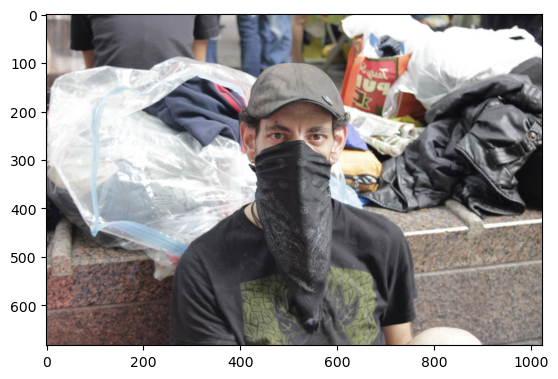

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import random
import glob
from PIL import Image

test_images_path = "PlasticDetection/images/001.Plastic_bag/images/test/*.jpg"
train_images_path = "PlasticDetection/images/001.Plastic_bag/images/train/*.jpg"


def visualize_transposed_bb(dataset):
    images_path = train_images_path if dataset == 'train' else test_images_path if dataset == 'test' else 0
    if dataset == 0:
        raise Exception("Invalid input parameter, must be either train or validation")
    
    start = 0
    end = 0
    
    if dataset == 'train':
        start, end, df, split = 53, 69, final_train_df, "train"
    elif dataset == 'test':
        start, end, df, split = 52, 68, final_test_df, "test"
    else:
        raise Exception("Invalid parameter")
    
    image_folder = images_path
    images_paths = glob.glob(image_folder)
    num_of_images = len(images_paths)
    random_int = random.randint(0, num_of_images - 1)
    random_image = images_paths[random_int]
    print(random_image)
    img = Image.open(random_image)
    img = img.transpose(Image.Transpose.FLIP_LEFT_RIGHT)
    id_of_image = random_image[start:end]
    #PlasticDetection/images/001.Plastic_bag/images/test/00a76046606aa888.jpg
    df_rows = df.loc[(df.ImagePath == f"/{split}/{id_of_image}.jpg") & (df.className == '0.000') ]
    
    image_width, image_height = img.size
    
    fig ,ax = plt.subplots()
    ax.imshow(img)
    
    
    for index, row in df_rows.iterrows():
        print(row['XMin'], row['XMax'], row['YMin'], row['YMax'])
        
        xmin = row['XMin']
        xmax = row['XMax']
        ymin = row['YMin']
        ymax = row['YMax']
        
        new_xmin = xmin * image_width
        new_xmax = xmax * image_width
        new_ymin = ymin * image_height
        new_ymax = ymax * image_height
        print(new_xmin,new_xmax,new_ymin,new_ymax)
        
        #flip the bb coordinates
        xmax_flipped = (image_width/2) - (new_xmin-(image_width/2))
        xmin_flipped = (image_width/2) - (new_xmax-(image_width/2))
        
        
        
        width = xmax_flipped - xmin_flipped
        height = new_ymax - new_ymin
        
        rect = patches.Rectangle((xmin_flipped,new_ymin), width, height, linewidth = 1, edgecolor = 'r', facecolor = 'none')
        ax.add_patch(rect)
    plt.show()
    
visualize_transposed_bb("train")

## Augmented Code

In [32]:
test_images_path = 'PlasticDetection/images/001.Plastic_bag/images/test*.jpg'
train_images_path = 'PlasticDetection/images/001.Plastic_bag/images/train/*.jpg'



def augment_data(dataset):
    base_path = "PlasticDetection/images/001.Plastic_bag/images"
    images_path = train_images_path if dataset == "train" else test_images_path if dataset == "test" else 0
    if images_path == 0:
        raise Exception("Invalid Input parameter")
    start = 0
    end = 0
    if dataset == "train":
        start,end,df = 29,45,final_train_df
    elif dataset == "test":
        start,end,df = 28,44,final_test_df
    
    
    temp_df = pd.DataFrame(columns=["header_cols","label_width","className","XMin","YMin","XMax","YMax","ImagePath"],dtype = object)
    counter = 0
    for index,row in df.iterrows():
        img_path = row["ImagePath"]#image path in the df
        id = img_path[start:end]
        im_path = f"{base_path}/{dataset}/{id}.jpg" #image path for the physical location of the image(full path
        img = Image.open(im_path)
        image_width,image_height = img.size
        img_flip = img.transpose(Image.Transpose.FLIP_LEFT_RIGHT)
        img_flip.save(f"{base_path}/{dataset}/flipped_{id}.jpg")
        new_image_path = f"{base_path}/{dataset}/flipped_{id}.jpg"
        
        xmin = row['XMin'] * image_width
        xmax = row['XMax'] * image_width
        ymin = row['YMin']
        ymax = row['YMax']
        
        #getting the new coordinates for the flipped bounding boxes
        new_xmin = ((image_width/2)-(xmin-(image_width/2))) / image_width
        new_xmax = ((image_width/2)-(xmax-(image_width/2))) / image_width
        
        
        temp_df.loc[counter]=[2,5,"0.000",new_xmin,ymin,new_xmax,ymax,new_image_path]
        counter +=1
    
    df_merged = pd.concat([df, temp_df], ignore_index=True)
    df_merged.to_csv(f"{dataset}.lst", sep="\t", float_format="%.4f", header=None)
    print(len(df)) #original df
    print("augmented df length below")
    print(len(temp_df))

In [33]:
augment_data("test")

198
augmented df length below
198


In [36]:
test_images_path = "PlasticDetection/images/001.Plastic_bag/images/test/*.jpg"
folder = glob.glob(test_images_path)
counter = 0
for i in folder:
    counter+= 1
print(counter)

324


In [37]:
198*2

396

In [38]:
augment_data("train")

788
augmented df length below
788


In [40]:
train_images_path = "PlasticDetection/images/001.Plastic_bag/images/train/*.jpg"
folder = glob.glob(train_images_path)
counter = 0
for i in folder:
    counter+=1
print(counter)

898


In [41]:
print(499*2)
print(162*2)

998
324


In [ ]:
## Final Result 

# Train_images_before_Augmentation = 499
# Test_images_before_Augmentation = 162
# Train_images_after_Augmentation = 898
# Test_images_after_Augmentation = 324

# Model Training

In [ ]:
import platform
import sys

if platform.linux_distribution()[0] == "debian":
    ! apt-get update
    ! apt-get install ffmpeg libsm6 libxext6 -y

!{sys.executable} -m pip install opencv-python
!{sys.executable} -m pip install mxnet

RESIZE_SIZE = 256
BASE_DIR = "PlasticDetection/"

### Creating RecordIO files for training Model 

In [ ]:
!python tools/im2rec.py --resize $RESIZE_SIZE --pack-label test $BASE_DIR/images/
!python tools/im2rec.py --resize $RESIZE_SIZE --pack-label train $BASE_DIR/images/

In [ ]:
import sagemaker
from sagemaker import get_execution_role

bucket = "plastic-object-detection" # s3 bucket name
prefix = "images" # sub-folder inside s3 bucket folder

role = get_execution_role()
sess = sagemaker.Session()

# Storing the bucket in /train folder for trainig
train_channel = prefix + "/train"
sess.upload_data(path= "train.rec", bucket = bucket, key_prefix = train_channel)
s3_train_data = "s3://{}/{}".format(bucket,train_channel)


# Storing the bucket in /validation folder for trainig
validation_channel = prefix + "/validation"
sess.upload_data(path= "test.rec", bucket = bucket, key_prefix = validation_channel)
s3_validation_data = "s3://{}/{}".format(bucket,validation_channel)

# Creating a output folder to store the results from training
s3_output_location =  "s3://{}/{}/output".format(bucket, prefix)

In [ ]:
from sagemaker import image_uris
from sagemaker.tuner import CategoricalParameter, ContinuousParameter, HyperparameterTuner

training_image = image_uris.retrieve(region = sess.boto_region_name, framework = "object-detection", version = "1")

od_model = sagemaker.estimator.Estimator(
    training_image,
    role,
    instance_count = 1,
    instance_type = "ml.p3.2xlarge",
    volume_size = 50,
    max_run = 360000,
    input_mode = "File",
    output_path = s3_output_location,
    sagemaker_session = sess,)

def set_hyperparameters(num_epochs, lr_steps):
    num_classes = 1
    num_training_samples = 898
    
    od_model.set_hyperparameters(
        base_network = "resnet-50",  # We are using resnet-50 pre-Trained Model for our model Training
        use_pretrained_model = 1,
        num_classes = num_classes,
        epochs = num_epochs,
        lr_scheduler_step = lr_steps,
        lr_scheduler_factor = 0.1,
        momentum = 0.9,
        weight_decay = 0.0005,
        nms_threshold = 0.45,
        image_shape = 512,
        num_training_samples = 898 
    )

set_hyperparameters(100, "50,70,80,90,95")

hyperparameter_ranges = {
    
    "learning_rate": ContinuousParameter(0.001,0.1),
    "mini_batch_size": CategoricalParameter([8,16]),
    "optimizer": CategoricalParameter(["sgd","adam"])

}

In [ ]:
max_jobs = 8
max_parallel_jobs = 1
objective_metric_name = "validation:mAP"
objective_type = "Maximize"

# Tuner
tuner = HyperparameterTuner(estimator = od_model,
                            objective_metric_name = objective_metric_name,
                            hyperparameter_ranges = hyperparameter_ranges,
                            objective_type = objective_type,
                            max_jobs = max_jobs,
                            max_parallel_jobs = max_parallel_jobs          
                           )
# Training Data
train_data = sagemaker.inputs.TrainingInput(
            s3_train_data,
            distribution = "FullyReplicated",
            content_type = "application/x-recordio",
            s3_data_type = "S3Prefix"
)

# Validation Data 
validation_data = sagemaker.inputs.TrainingInput(
            s3_validation_data,
            distribution = "FullyReplicated",
            content_type = "application/x-recordio",
            s3_data_type = "S3Prefix"
)

data_channels = {"train": train_data, "validation": validation_data}

# Model Training 
tuner.fit(inputs = data_channels, logs = True)

# Deployment

In [ ]:
import sagemaker
from sagemaker import get_execution_role
from sagemaker import image_uris
import json 
import boto3

role = get_execution_role()

training_image = image_uris.retrieve(
    region = sess.boto_region_name, framework = "object-detection", version = "1"
)

model = sagemaker.model.Model(
image_uri = training_image,
model_data = 'plastic-detection.tar.gz', # Copy s3 URI from s3 Bucket 
role = role    
)

endpoint_name = 'plastic-ddetection' # We can see the deployment Mode at { Sage Maker --> Inference --> Endpoint}  

deployment = model.deploy(
initial_instance_count = 1,
instance_type = "ml.m4.xlarge",
endpoint_name = endpoint_name)


In [ ]:
import json 
import boto3
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpim


runtime = boto3.client(service_name = "runtime.sagemaker")

#### Creating a visualization function

In [ ]:
def visualize_detection(img_file, dets, thresh = 0.6):
    img = mpimg.imread(img_file)
    plt.imshow(img)
    width = img.shape[1]
    height = img.shape[0]
    colors = dict()
    num_detections = 0
    for det in dets:
        (klass,score,x0,y0,x1,y1) = det #0
        if score < thresh:
            continue
        num_detections +=1
        cls_id = int(klass)#1
        if cls_id not in colors:
            colors[cls_id] = (random.random(),random.random(),random.random()) #(0.1,0.5,0.4)
        xmin = int(x0*width)
        ymin = int(y0*height)
        xmax = int(x1*width)
        ymax = int(y1*height) 
        
        
        rect = plt.Rectangle(
            (xmin,ymin),
            xmax - xmin,
            ymax - ymin,
            fill = False,
            edgecolor = colors[cls_id],
            linewidth = 3.5
        )
        plt.gca().add_patch(rect)
        plt.gca().text(
        xmin,
        ymin-2,
        "{:.3f}".format(score),
        bbox = dict(facecolor = colors[cls_id], alpha = 0.5),
        fontsize = 12,
        color = "white"
        )
    print("Number of detections" + str(num_detections))
    plt.show()

#### Creating a function a output the image by testing our Model

In [ ]:
def show_plastic_prediction(filename, ep, thresh = 0.3):
    b = ""
    with open(filename, "rb" ) as image:
        f = image.read()
        b = bytearray(f)
    endpoint_response = runtime.invoke_endpoint(EndpointName = ep, ContentType = "image/jpeg", Body = b)
    results = endpoint_response["Body"].read()
    detections = json.loads(results)
    
    
    visualize_detection(filename, detections['prediction'], thresh)

#### Testing the Model 

In [ ]:
show_plastic_prediction('InternetImages/pexels-timur-weber-9533031.jpg', endpoint_name)

# Batch Transformation 

In this process we are predicting the plastic bounding boxes for 'n' number of images at a time. Need to make sure that all the resources are created in the same region.

In [ ]:
from datetime import datetime

date_today = datetime.today().strftime('%Y-%m-%d')

year = date_today[0:4]
month = date_today[5:7]
day = date_today[8:10]

In [ ]:
import sagemaker
from sagemaker import get_execution_role, image_uris

role = get_execution_role()
sess = sagemaker.Session()
training_image = image_uris.retrieve(region = sess.boto_region_name, framework = "object-detection", version = "1")

In [ ]:
model = sagemaker.model.Model(
    image_uri = training_image,
    model_data = 'plastic-detection.tar.gz', # Copy s3 URI from s3 Bucket ( Taking the best model after training) 
    role = role
)

transformer = model.transformer(
    instance_count = 1,
    output_path = f's3/batch-plastic-detection/output/{year}/{month}/{day}', # Creating a output path to store the results
    instance_type = 'ml.m4.xlarge'
)

sample_data_bucket = 'batch-plastic-detection' # output path where the output files will be stored.
input_file_path = f'images/{year}/{month}/{day}' # Input path where we have images.

transformer.transform(
    "s3://{}/{}".format(sample_data_bucket,input_file_path), content_type = "image/jpeg"
)

### Creation a function to visulize the output

In [ ]:
from datetime import datetime

date_today = datetime.today().strftime('%Y-%m-%d')

year = date_today[0:4]
month = date_today[5:7]
day = date_today[8:10]

print(date_today)

In [ ]:
s3 = boto3.resource('s3')

my_bucket = s3.Bucket('batch-plastic-detection')

files = []

for object_summary in my_bucket.objects.filter(Prefix = f'batch-output/{year}/{month}/{day}'):
    out_file = object_summary.key[24:]
    files.append(out_file)

#!mkdir -p Batch_test_images  created an Batch_test_images folder for storing the results 

In [ ]:
import json
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sagemaker.s3 import S3Downloader


num_detections = []

thresh = 0.3

for i in files:
    file_key = f'/{year}/{month}/{day}/{i}'
    file_name_in_sagemaker = f'Batch_test_images/{i[:-4]}'
    output = S3Downloader.read_file(file_key)
    detections = json.loads(output)
    detection_results = detections['prediction']
    img = mpimg.imread(file_name_in_sagemaker)
    plt.imshow(img)
    width = img.shape[1]
    height = img.shape[0]
    colors = dict()
    num_detections = 0
    for det in detection_results:
        (klass,score, x0,y0,x1,y1) = det #0
        if score < thresh:
            continue
        num_detections +=1
        cls_id = int(klass)#1
        if cls_id not in colors:
            colors[cls_id] = (random.random(),random.random(),random.random()) #(0.1,0.5,0.4)
        xmin = int(x0*width)
        ymin = int(y0*height)
        xmax = int(x1*width)
        ymax = int(y1*height) 
        width = xmax-xmin
        height = ymax-ymin
        
        rect = plt.Rectangle(
            (xmin,ymin),
            width,#width
            height, #height
            fill = False,
            edgecolor = colors[cls_id],
            linewidth = 3.5
        )
        plt.gca().add_patch(rect)
        plt.gca().text(
        xmin,
        ymin-2,
        "{:.3f}".format(score),
        bbox = dict(facecolor = colors[cls_id], alpha = 0.5),
        fontsize = 12,
        color = "white"
        )
    print("Number of detections" + str(num_detections))
    plt.show()